In [1]:
import numpy as np
from numpy import seterr
from numpy import transpose as trans
from numpy import matmul as mmul
import sklearn
from sklearn import linear_model
import random, sys, time
np.seterr(over='raise', under='ignore', divide='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
data = np.genfromtxt('train_data.csv', delimiter = ',')
data = sklearn.preprocessing.normalize(data)
target = np.genfromtxt('train_targets.csv', delimiter = ',') # (3000, )

test_data = np.genfromtxt('test_data.csv', delimiter = ',')
test_data = sklearn.preprocessing.normalize(test_data)
test_targets = np.genfromtxt('test_targets.csv', delimiter = ',')

In [3]:
test_targets.shape

(1000,)

In [4]:
def sigmoid(x):
    max_elem = np.max(-x) 
    try: 
        res = -(np.log(np.exp(0 - max_elem) + np.exp(- x - max_elem)) + max_elem ) # Only underflow could happen
        res = np.exp(res)
    except Exception as e:
        res = 0
    return res

In [5]:
def gen_weight(d, q): #  d+1 * q
    theta1 = (np.random.rand(d, q) - 0.5) / 10
    # theta1 = np.append(theta1, np.zeros([1, q]), 0)
    return theta1
#gen_weight(3,2)

In [6]:
def hypo(x, w, gamma):
    return (sigmoid(np.matmul(x, w) - gamma))

In [7]:
def g(y, y_hat):
    return (y - y_hat) * y_hat * (1 - y_hat)

In [8]:
def e(b, w, g):
    # print('b:', b.shape, ' w: ',  w.shape, ' g: ', g.shape) # b: (1, 100)  w:  (100, 10)  g:  (1, 10)
    
    e_temp = b*(1-b) * mmul(g, trans(w)) # 
    # print('e :', e_temp.shape)
    return e_temp # 1, q = 100

In [9]:
def cal_y_hat(x, v, gamma, w, theta):
    b = hypo(x, v, gamma)
    y_hat = hypo(b, w, theta)
    #print(y_hat[5:155])
    return trans(y_hat.argmax(axis=1)) # m, 1

In [10]:
def cost(x, v, gamma, w, theta, y): 
    y_result = cal_y_hat(x, v, gamma, w, theta)
    #print(y_result[5:155])
    return np.count_nonzero(abs(np.round(y_result - y)))

In [11]:
def update(x, v, gamma, w, theta,  y):
    b = hypo(x, v, gamma) # 1, q
    # print('b', b.shape)
    y_hat = hypo(b, w, theta)
    # print('y_hat:', y_hat.shape) # 1, k
    g_temp = g(y, y_hat)
    w += learn_rate * mmul(trans(b), g_temp) # q, k
    theta += -learn_rate * g_temp # 1, k
    
    
    e_temp = e(b, w, g_temp) # 1, q
    # print('e.shape = ', e_temp.shape)
    v += learn_rate * mmul(trans(x).reshape(len(x), 1), e_temp) # d, q = (1, d)' * (1, q)
    
    gamma += -learn_rate * e_temp
    return v, gamma, w, theta, y_hat

In [20]:
print(y)

[1 4 9 ..., 4 5 6]


In [19]:
target.shape

(3000,)

In [42]:
# Init 

(m, d) = data.shape
q = 100 # number of hidden nodes
k = 10 # number of classes
learn_rate = 0.5
x = data
y = target.astype('int')

v = gen_weight(d, q) # d , q
gamma = np.zeros([1, q])
w = gen_weight(q, k) # q , k
theta = np.zeros([1, k])

iter = 20
start_time = time.time()

for j in range(iter):
    if(j % 100 == 0): print(j)
    for i in range(x.shape[0]):
        y_scalar = np.zeros([1, k])
        y_scalar[:,y[i]] = 1
        v, gamma, w, theta, y_hat = update(x = x[i, :], v = v, gamma = gamma, w = w, theta = theta, y = y_scalar)
#         print(cost(x[i,:], v, gamma, w, theta, y[i]), y_hat, y[i])


print('Train error:' , cost(x, v, gamma, w, theta,  y))
print('Test error:' , cost(test_data, v, gamma, w, theta,  test_targets.astype('int')))
print("--- %s seconds ---" % (time.time() - start_time))
test_pred = cal_y_hat(test_data, v, gamma, w, theta)
np.savetxt('test_predictions.csv', test_pred, "%d", delimiter=',')

0
Train error: 310
Test error: 123
--- 16.687745094299316 seconds ---


```
100
Train error: 134
Test error: 84
--- 123.95683932304382 seconds ---
```

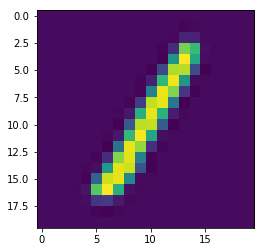

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.reshape(x[0,:], (20,20),'F'))